In [1]:
import numpy as np
from dateutil import parser
import sqlite3
from sqlite3 import Error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def fetch_all(conn, query):
    c = conn.cursor()
    c.execute(query)
    return c.fetchall()

In [3]:
def create_connection(db_file):
    conn = None

    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [4]:
def find_one(conn, query, value):
    c = conn.cursor()
    c.execute(query, value)
    return c.fetchone()

In [5]:
def main():
    overview = np.zeros((7, 24))

    db = create_connection(r"../teams.db")
    #entries = fetch_all(db, 'select pub_date from publications')
    entries = fetch_all(db, 'select publication_id from occurrences where cnt = 1')
    
    for entry in entries:
        date = find_one(db, 'select pub_date from publications where id = ?', (entry[0],))[0]


        dt = parser.parse(date)
        row = dt.weekday()
        column = dt.hour

        overview[row][column] += 1

    return overview

In [9]:
def plot_heatmap(arr, l):
    matplotlib.rcParams['axes.titlepad'] = 40
    matplotlib.rcParams['axes.labelpad'] = 20
    plt.figure(figsize=(30., 7.))

    ylabels = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.set(
        font_scale=1.2
    )
    ax = sns.heatmap(arr, annot=False, linewidths=.7, yticklabels=ylabels,cbar_kws={
        'label': 'Publications amount'
    })
    ax.set(
        title=l,
        xlabel='Time',
        ylabel='Week days'
    )

    plt.show()

In [7]:
a = main()

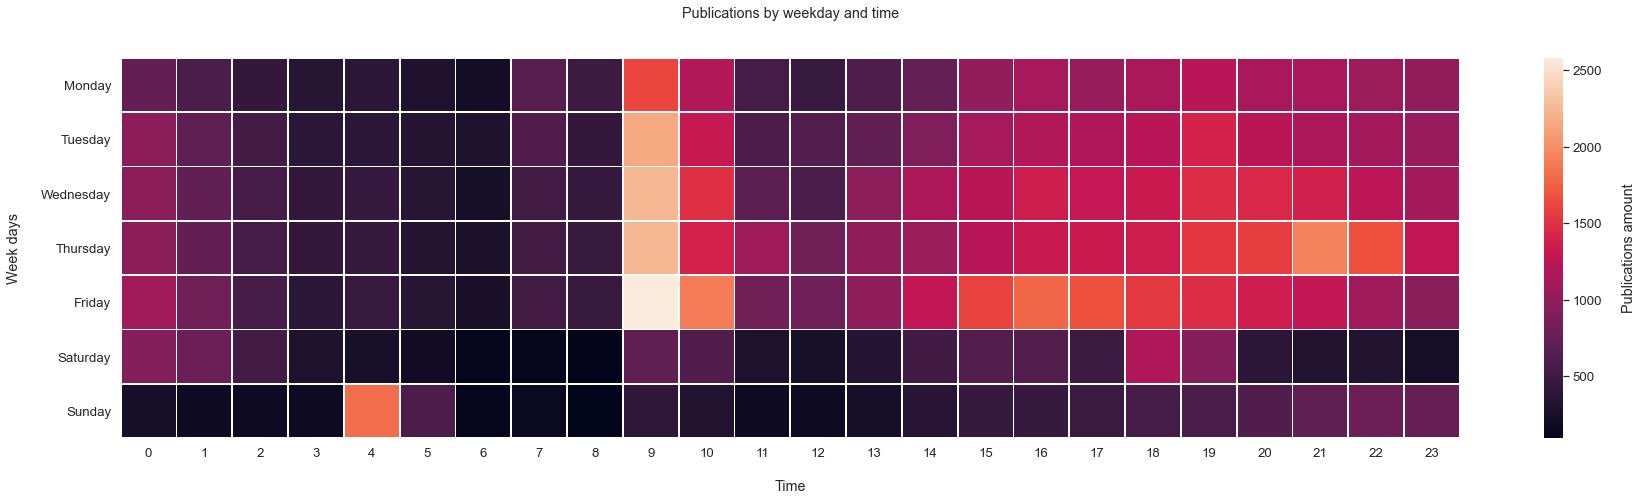

In [10]:
plot_heatmap(a, 'Publications by weekday and time')